# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [105]:
import pandas as pd
#!pip install openpyxl

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [106]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows=30000)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,NaN,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [107]:
print(df.shape)
# There are 30,000 rows in the dataset (or at least in our dataset)

print(df.dtypes)
# Most of the columns are strings, but "Owner Zip Code" is an intenger
# and "Animal Birth", "Application Date", "License Issued Date" and "License Expired Date" are dates?

(30000, 15)
Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object


## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

The dataset contains all dogs in NYC that had a valid license on April 28th, 2016.
- The column "Vaccinated" provides information on whether a dog is vaccinated or not. 
- The column "Animal Gender" contains information on whether the dog is a male (M) or a female (F)

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

- Are there more male or female dogs in New York?
- Is it common for dogs to be unvaccinated?
- What are the three most popular dog breeds in each zipcode?
- In some cases, the primary breed is unknown but the secondary breed is listed. Why?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [108]:
df['Primary Breed'].value_counts().head(10)

Unknown                                 4777
Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Name: Primary Breed, dtype: int64

<AxesSubplot: xlabel='number of dogs', ylabel='dog breed'>

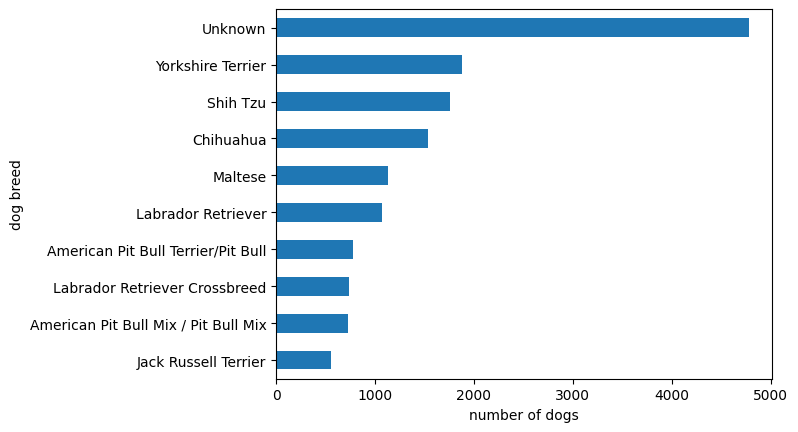

In [109]:
df['Primary Breed'].value_counts(ascending=True).tail(10).plot(kind='barh',xlabel = 'number of dogs',ylabel = 'dog breed')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<AxesSubplot: xlabel='number of dogs', ylabel='dog breed'>

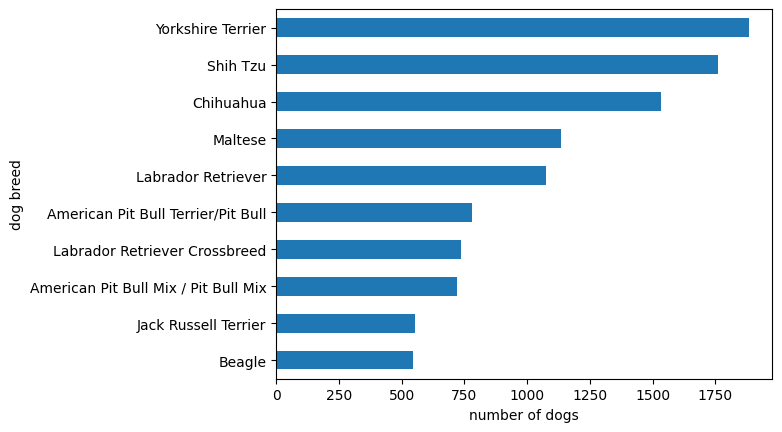

In [110]:
known_df = df[df["Primary Breed"].str.contains('Unknown')==False]
known_df['Primary Breed'].value_counts(ascending = True).tail(10).plot(kind='barh', xlabel = 'number of dogs',ylabel = 'dog breed')

## What are the most popular dog names?

In [111]:
df['Animal Name'].value_counts()

UNKNOWN          203
Max              202
Unknown          197
Bella            193
Charlie          172
                ... 
Bluno              1
DARBY              1
CHARLEY VIVAR      1
TINY               1
Squeeze            1
Name: Animal Name, Length: 13721, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [115]:
print(df[df['Animal Name'] == 'Laura'])
# There is one labrador retriever named Laura 

       Owner Zip Code Animal Name Animal Gender       Primary Breed  \
10375           10021       Laura             F  Labrador Retriever   

      Secondary Breed Animal Dominant Color Animal Secondary Color  \
10375             NaN                   Tan                    NaN   

      Animal Third Color Animal Birth Spayed or Neut Guard or Trained  \
10375                NaN   2013-04-01            Yes              NaN   

      Vaccinated        Application Date License Issued Date  \
10375        Yes 2015-06-02 16:11:15.630          2015-06-02   

      License Expired Date  
10375           2016-06-02  


In [116]:
print(df[df['Animal Name'] == 'Max'].shape)
# There are 202 dogs named Max

(202, 15)


In [117]:
print(df[df['Animal Name'] == 'Maxwell'].shape)
# There are 11 dogs named Maxwell. 

(11, 15)


## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [119]:
df.value_counts(['Guard or Trained'], normalize =True)

Guard or Trained
No                  0.999143
Yes                 0.000857
dtype: float64

## What are the actual numbers?

In [120]:
df.value_counts(['Guard or Trained'])

Guard or Trained
No                  19809
Yes                    17
dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [122]:
df.value_counts(['Guard or Trained'], dropna=False)
# looks like there are 10174 dogs where it is unknown whether they are guard dogs or not

Guard or Trained
No                  19809
NaN                 10174
Yes                    17
dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [124]:
# I use fillna to replace all the empty rows with 'no'
df['Guard or Trained'] = df['Guard or Trained'].fillna("No")
df['Guard or Trained'].value_counts()

No     29983
Yes       17
Name: Guard or Trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [125]:
df[df['Guard or Trained']=='Yes']['Primary Breed'].value_counts()

Unknown                       5
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: Primary Breed, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [126]:
df['year'] = df['Animal Birth'].apply(lambda birth: birth.year)
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [127]:
df['age'] = 2022 - df.year
df

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,12
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,12
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,8
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,13


# Joining data together

In [129]:
zip_df = pd.read_csv('zipcodes-neighborhoods.csv')
zip_df.dtypes

neighborhood    object
zip              int64
borough         object
dtype: object

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [130]:
# First I rename the column "Owner Zip Code" to "zip" so it matches the "zip" column
# in zip.df which allows me to join the data together.
df = df.rename(columns={'Owner Zip Code': 'zip'})
df

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,12
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,12
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,8
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,13


In [131]:
# And then I merge the two dataframes where the zip columns match. 
merged_df = pd.merge(df, zip_df, how = 'outer', on = 'zip')
merged_df

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007.0,15.0,Upper West Side,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008.0,14.0,Upper West Side,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011.0,11.0,Upper West Side,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,No,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011.0,11.0,Upper West Side,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007.0,15.0,Upper West Side,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,14420,Cobey,M,Beagle Crossbreed,NaN,Black,White,Brown,2011-01-01,Yes,No,Yes,2015-08-16 03:04:47.377,2015-08-16,2016-08-16,2011.0,11.0,NaN,NaN
29999,11753,YOYO,M,"Poodle, Miniature",NaN,Brown,NaN,NaN,2014-07-01,No,No,Yes,2015-08-19 23:44:50.010,2015-08-19,2016-08-19,2014.0,8.0,NaN,NaN
30000,10020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,Chelsea and Clinton,Manhattan
30001,11359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaN,North Queens,Queens


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [132]:
# Using the new merged dataframe I can ask for the rows where the borough is Bronx and count the dog names, finding the most popular ones
merged_df[merged_df.borough == 'Bronx']['Animal Name'].value_counts()

Bella                  22
Max                    21
Rocky                  20
Unknown                16
Princess               15
                       ..
Henny                   1
MAXX                    1
Ginger Gaston           1
Frisco Melendez         1
Montana Monti Nash      1
Name: Animal Name, Length: 2032, dtype: int64

In [133]:
# I do the same with Brooklyn
merged_df[merged_df.borough == 'Brooklyn']['Animal Name'].value_counts()

Unknown        97
Max            46
Bella          45
unknown        45
UNKNOWN        45
               ..
GUINNESS        1
Red Jupiter     1
Becky           1
Doug            1
Zev             1
Name: Animal Name, Length: 4539, dtype: int64

In [134]:
# And with the Upper East Side (just changing the column from borough to neighborhood)
merged_df[merged_df.neighborhood == 'Upper East Side']['Animal Name'].value_counts()

Charlie      19
Bella        12
NO NAME      11
Lola         10
Lucy         10
             ..
SEBASTAN      1
Sigmund       1
Macdougal     1
Nikki         1
OLIVE         1
Name: Animal Name, Length: 1383, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [135]:
merged_df.groupby('neighborhood')['Primary Breed'].agg(pd.Series.mode)
# It looks like the most common dog breed in each neighborhood is unknown - except for in Hunts Point and Mott Haven
# where they really like Chihuahuas.

# Is there a way to get rid of the Unknowns and only look at the known dogs with known breeds.

neighborhood
Borough Park                       Unknown
Bronx Park and Fordham             Unknown
Bushwick and Williamsburg          Unknown
Canarsie and Flatlands             Unknown
Central Bronx                      Unknown
Central Brooklyn                   Unknown
Central Harlem                     Unknown
Central Queens                     Unknown
Chelsea and Clinton                Unknown
East Harlem                        Unknown
East New York and New Lots         Unknown
Flatbush                           Unknown
Gramercy Park and Murray Hill      Unknown
Greenpoint                         Unknown
Greenwich Village and Soho         Unknown
High Bridge and Morrisania         Unknown
Hunts Point and Mott Haven       Chihuahua
Inwood and Washington Heights      Unknown
Jamaica                            Unknown
Kingsbridge and Riverdale          Unknown
Lower East Side                    Unknown
Lower Manhattan                    Unknown
Mid-Island                         Unknow

## What breed of dogs are the least likely to be spayed? Male or female?

In [136]:
# To find out what dogs are least likely to be spayed I group the dogs by primary breed and then I count amounts of each 
# breed that are spayed and not spayed.
spayed_df = merged_df.groupby('Primary Breed')['Spayed or Neut'].value_counts(normalize=True).sort_values(ascending=False)
spayed_df
# It looks like the breed 'Polish Hound' is the least likely to be spayed – none of them are. 

Primary Breed                  Spayed or Neut
Collie Crossbreed              Yes               1.000000
Russell Terrier                Yes               1.000000
English Foxhound               Yes               1.000000
Polish Hound                   No                1.000000
Dutch Shepherd                 Yes               1.000000
                                                   ...   
Labrador Retriever Crossbreed  No                0.042005
Welsh Corgi, Cardigan          No                0.040000
German Shepherd Crossbreed     No                0.033241
Greyhound                      No                0.017857
Bassett Hound                  No                0.016949
Name: Spayed or Neut, Length: 430, dtype: float64

In [137]:
# Then I look at whether male or female dogs are the least likely to be spayed 
df.groupby(['Animal Gender'])['Spayed or Neut'].value_counts(normalize=True)
# It looks like male dogs are less likely to be spayed. 

Animal Gender  Spayed or Neut
               Yes               1.000000
F              Yes               0.857850
               No                0.142150
M              Yes               0.791856
               No                0.208144
Name: Spayed or Neut, dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [138]:
# First I create three new variables, specifying that the three categories of color should be monochrome (true/false)
dominant = df['Animal Dominant Color'].str.contains('Black|White|Grey', case=False, na=True)
secondary = df['Animal Secondary Color'].str.contains('Black|White|Grey', case=False, na=True)
third = df['Animal Third Color'].str.contains('Black|White|Grey', case=False, na=True)

import numpy as np

# and then I create a new column that contains the information (true/false) of whether each dog only has monochrome
# colours. 
df['monochrome'] = np.where((dominant & secondary & third),True, False)


df


,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,monochrome
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,False
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,9,False
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,8,False
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,14,False
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,11372,Bella,F,Unknown,Goldendoodle,CREAM,WHITE,TAN,2010-07-01,Yes,No,Yes,2015-08-22 19:00:39.303,2015-08-22,2016-09-27,2010,12,False
29996,11417,Sadie,F,"Schnauzer, Miniature",NaN,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2015-08-22 19:03:08.003,2015-08-22,2016-09-28,2010,12,False
29997,11228,unknown,M,Pomeranian,NaN,Tan,White,NaN,2014-03-01,Yes,No,Yes,2015-08-22 19:04:56.720,2015-08-22,2016-08-22,2014,8,False
29998,11217,daisy,F,Unknown,NaN,GRAY,WHITE,BLACK,2009-01-01,Yes,No,Yes,2015-08-22 19:14:30.177,2015-08-22,2016-08-05,2009,13,False


## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot: xlabel='number of dogs'>

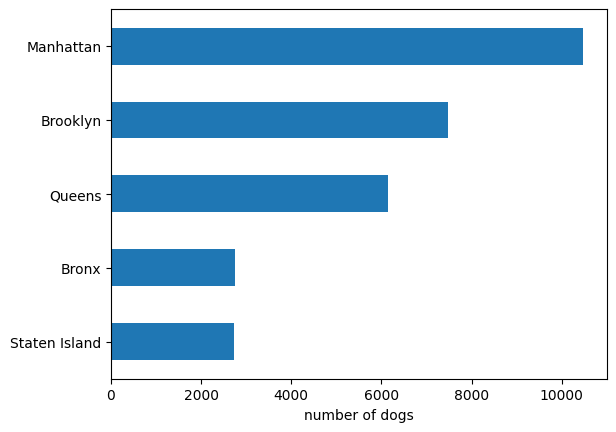

In [139]:
# I plot the number of dogs in each borough in a horizontal bar chart. 
merged_df.borough.value_counts(ascending=True).plot(kind='barh',xlabel = 'number of dogs')

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [141]:
population_df = pd.read_csv("boro_population.csv")
population_df

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [146]:
merged2_df = pd.merge(merged_df, population_df, how = 'outer', on = 'borough' )
merged2_df.head(5)

,zip,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,...,Vaccinated,Application Date,License Issued Date,License Expired Date,year,age,neighborhood,borough,population,area_sqmi
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,...,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007.0,15.0,Upper West Side,Manhattan,1644518.0,23.0
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,...,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008.0,14.0,Upper West Side,Manhattan,1644518.0,23.0
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,...,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011.0,11.0,Upper West Side,Manhattan,1644518.0,23.0
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,...,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011.0,11.0,Upper West Side,Manhattan,1644518.0,23.0
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,...,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007.0,15.0,Upper West Side,Manhattan,1644518.0,23.0


In [150]:
borodogs_df = merged2_df.borough.value_counts().to_frame()


In [153]:
dogpop = borodogs_df.div(merged2_df.population)

#dogpop = borodogs_df / merged2_df.population

dogpop

# I can't make this one work

,borough,0,1,2,3,4,5,6,7,8,...,29993,29994,29995,29996,29997,29998,29999,30000,30001,30002
Manhattan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brooklyn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Queens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bronx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Staten Island,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

## What percentage of dogs are not guard dogs?

In [80]:
df['Guard or Trained'].value_counts(normalize =True) 

No     0.999433
Yes    0.000567
Name: Guard or Trained, dtype: float64